In [27]:
import numpy as np
import xarray as xr # used to help convert NetCDF data to dataframe structure
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller # Used for ADF Test
import statsmodels.tsa.api as sm
from pandas.core import datetools

a = xr.open_dataset('30_year_point_Q2.nc')

data = a.to_dataframe()  # create dataframe
Q2 = data['Q2'].values   # pull water vapor values

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  import sys


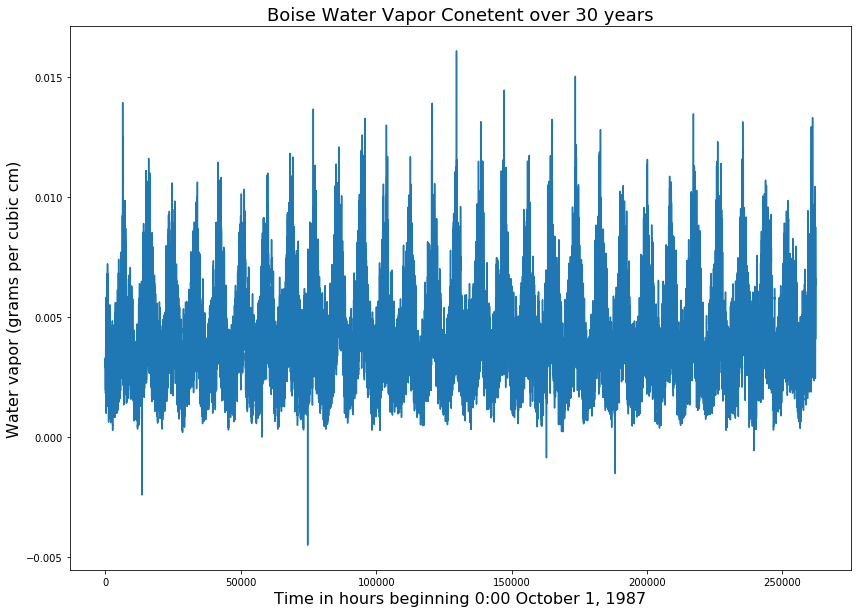

In [2]:
# Plot and label Q2 data
plt.figure(figsize=(14,10))
plt.title('Boise Water Vapor Conetent over 30 years',fontsize=18)
plt.ylabel('Water vapor (grams per cubic cm)', fontsize=16)
plt.xlabel('Time in hours beginning 0:00 October 1, 1987', fontsize=16)
plt.plot(Q2)
plt.show()

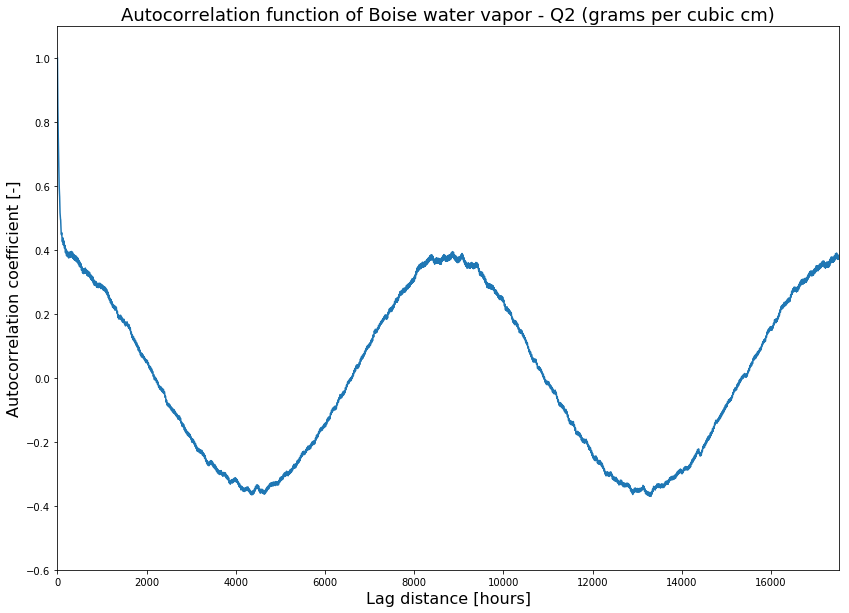

In [3]:
# Create sequences for looping through Q2 array
Nk = 24*365*2
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

# Loop to create correlation coefficients for each lag from 1 - Nk
for k in K:
    q =Q2[k:-1] 
    q1 = Q2[0:-(1+k)]
    R = np.corrcoef(q,q1)
    Rk[k] = R[1,0]
  
    
# Plot Autocorrelation funciton    
plt.figure(figsize=(14,10))
plt.plot(K,Rk)
plt.xlim(0.0,np.amax(K.astype(float)))
plt.ylim(-.6,1.1)
plt.title('Autocorrelation function of Boise water vapor - Q2 (grams per cubic cm)',fontsize=18)
plt.xlabel('Lag distance [hours]',fontsize=16)
plt.ylabel('Autocorrelation coefficient [-]',fontsize=16)
plt.show()

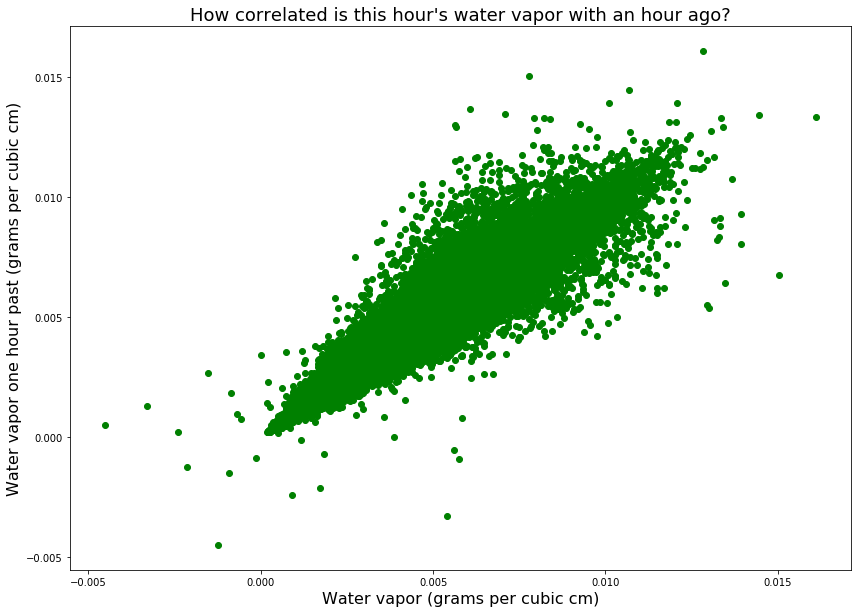

The correlation coefficient of values lagged by 1 hour is: 0.977537428192


In [4]:
# Create arrays of Q2 lagged by 1 timestep

q = Q2[0:-2]
q1 = Q2[1:-1]

# Create scatter plot of lagged values
plt.figure(figsize=(14,10))
plt.plot(q,q1,'o',color="green")
plt.title('How correlated is this hour\'s water vapor with an hour ago?',fontsize=18)
plt.xlabel('Water vapor (grams per cubic cm)', fontsize=16)
plt.ylabel('Water vapor one hour past (grams per cubic cm)', fontsize=16)
plt.show()

# Calculate correlation coefficient (R-value)
R = np.corrcoef(q,q1)
print('The correlation coefficient of values lagged by 1 hour is:',R[1,0])

In [8]:
Nk = 72
K  = np.arange(0,Nk,1)
Rk = np.zeros((Nk,1))

for k in K:
    q =Q2[k:-1] 
    q1 = Q2[0:-(1+k)]
    R = np.corrcoef(q,q1)
    Rk[k] = R[1,0]
    print('The correlation coefficient of values lagged by 24 hours is:',R[1,0])


The correlation coefficient of values lagged by 24 hours is: 1.0
The correlation coefficient of values lagged by 24 hours is: 0.977537428192
The correlation coefficient of values lagged by 24 hours is: 0.957485741232
The correlation coefficient of values lagged by 24 hours is: 0.939457584175
The correlation coefficient of values lagged by 24 hours is: 0.922377976587
The correlation coefficient of values lagged by 24 hours is: 0.906025024741
The correlation coefficient of values lagged by 24 hours is: 0.890361261422
The correlation coefficient of values lagged by 24 hours is: 0.875124110744
The correlation coefficient of values lagged by 24 hours is: 0.860433052811
The correlation coefficient of values lagged by 24 hours is: 0.846893111052
The correlation coefficient of values lagged by 24 hours is: 0.834645957684
The correlation coefficient of values lagged by 24 hours is: 0.823996740028
The correlation coefficient of values lagged by 24 hours is: 0.812968593964
The correlation coeffic

In [17]:
q = Q2[0:-2]
q1 = Q2[1:-1]
R1 = np.corrcoef(q,q1)
print('The correlation coefficient of values lagged by 1 hour is:',R1[1,0])

q = Q2[0:-3]
q1 = Q2[2:-1]
R2 = np.corrcoef(q,q1)
print('The correlation coefficient of values lagged by 2 hours is:',R2[1,0])

The correlation coefficient of values lagged by 1 hour is: 0.977537428192
The correlation coefficient of values lagged by 2 hours is: 0.957485741232


In [26]:
phi_1 = (1-((R1[1,0]**2-R2[1,0])/(R1[1,0]**2-1)))*R1[1,0]
phi_2 = (R1[1,0]**2-R2[1,0])/(R1[1,0]**2-1)


print(phi_1)
print(phi_2)

0.935586218541
0.0429151953073


In [29]:
Q_AR1_model = sm.AR(Q2).fit(1)
print(Q_AR1_model.params)

[  8.64887510e-05   9.77540961e-01]


In [31]:
Q_AR2_model = sm.AR(Q2).fit(2)
print(Q_AR2_model.params)

[  8.27729850e-05   9.35585758e-01   4.29200210e-02]


TypeError: object of type 'numpy.float32' has no len()

In [37]:
24*365*2

17520

In [55]:
train_Q2 = Q2[0:(262302-(24*365*2))] 
test_Q2 = Q2[-(24*365*2):]

262302